# Question 2

In [1]:
# Reading Libraries 
import cv2
import numpy as np 
from matplotlib import pyplot as plt
import pickle
import os

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

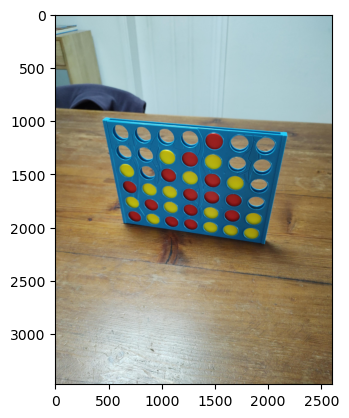

In [2]:
# Read in images 
im_01 = cv2.imread('connect_four_images_A1/004.jpg')
im_01 = cv2.cvtColor(im_01, cv2.COLOR_BGR2RGB)

plt.imshow(im_01)

In [3]:
# Function to determine image state 

def find_game_state(image): 

    # Morphology and contour finding to find corners

    


    # Apply perspective transformation 


    # Read game state using colour thresholding and contour statistics 

    # Initialise array to store game state 
    state = np.zeros((6,7))

    None

    return state

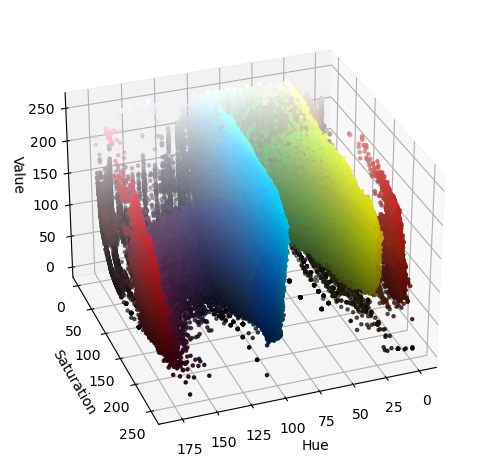

In [4]:


im_01 = cv2.imread('connect_four_images_A1/004.jpg')
im = cv2.cvtColor(im_01, cv2.COLOR_BGR2RGB)

im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

pixel_colours = im.reshape((im.shape[0]*im.shape[1], 3))
norm = colors.Normalize(vmin=-1.0,vmax=1.0)
norm.autoscale(pixel_colours)
pixel_colours = norm(pixel_colours).tolist()

# visualise the colours in a RGB colour space
H, S, V = cv2.split(im_hsv)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(H.flatten(), S.flatten(), V.flatten(), facecolors=pixel_colours, marker='.')
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
axis.view_init(30,70) # (elevation, azimuth, roll): try adjusting to view from different perspectives

plt.tight_layout()



# Apply a colour threshold 

# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
# thresh_im2 = cv2.morphologyEx(thresh_im1, cv2.MORPH_OPEN, kernel)
# thresh_im2 = cv2.morphologyEx(thresh_im2, cv2.MORPH_CLOSE, kernel)

# Calculate contours in the binary image
# contours, hierarchy = cv2.findContours(thresh_im2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# # draw these contours to the image and display the number of extracted contours
# im_temp = thresh_im2.copy()
# im_temp = cv2.cvtColor(im_temp, cv2.COLOR_GRAY2RGB)
# cv2.drawContours(im_temp, contours, -1, (0,255,0), 3) # draw using bright green

# plt.imshow(im_temp, 'gray') # show the thresholded image

# print("Number of contours found: %d"%(len(contours)))

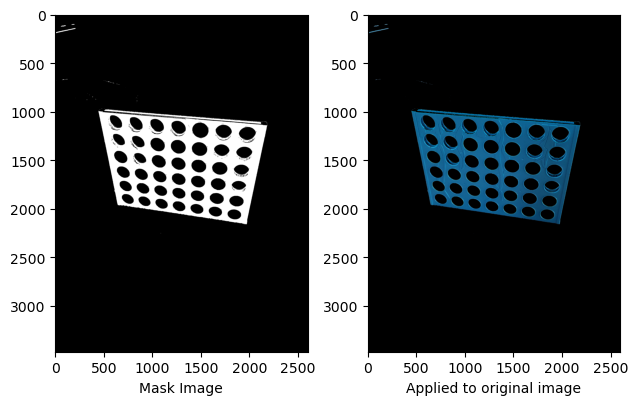

In [5]:
# Define a mask for the blue 

# define lower and upper ranges of HSV to extract blue board 
lower_hsv = (75,100,10)
upper_hsv = (105,255,220)

# Create mask of pixel inside range of lower and upper colours
mask = cv2.inRange(im_hsv, lower_hsv, upper_hsv) # (Image, lower_bound, upper_bound)

# Apply mask to visualise
im_thresh = im.copy()
im_thresh[(mask==0),:] = (0,0,0)
#im_temp = cv2.bitwise_and(im, im, mask=mask) # alternative way

# Display image and mask
plt.subplot(121)
plt.imshow(mask, 'gray')
plt.xlabel('Mask Image')

plt.subplot(122)
plt.imshow(im_thresh)
plt.xlabel('Applied to original image')

plt.tight_layout()

Number of contours found: 191
Rectangle corner points:
[[ 376 2056]
 [ 446  993]
 [2182 1107]
 [2112 2169]]


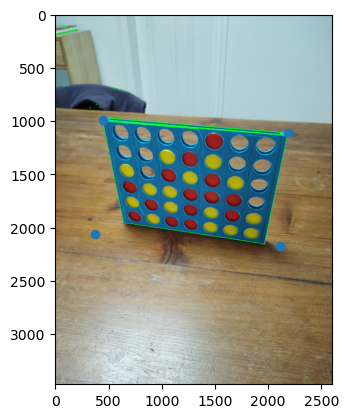

In [ ]:
# Apply contour to find edges of the board 
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
im_contours = im.copy()
cv2.drawContours(im_contours, contours, -1, (0,255,0), 3) # draw using bright green

plt.imshow(im_contours) # show the thresholded image


# Finding contour with largest area corresponding to outside of board 
rect_contour = cv2.minAreaRect(largest_contour)

# Get the 4 corner points 
rect_corners = np.int0(cv2.boxPoints(rect_contour))  

print("Rectangle corner points:")
print(rect_corners)

x = rect_corners[:,0]
y = rect_corners[:,1]

plt.scatter(x, y)

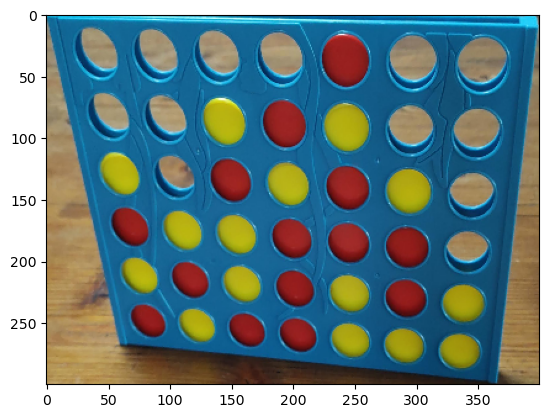

In [7]:
# Apply perspective transformation to the board

h = 300
w = 400

corner_points_output = np.float32([
    [0, h - 1],      
    [0, 0],          
    [w - 1, 0],      
    [w - 1, h - 1]   
])

M = cv2.getPerspectiveTransform(np.float32(rect_corners), corner_points_output)
warped_image = cv2.warpPerspective(im, M, (w,h))

plt.imshow(warped_image)


In [ ]:
# Finding the game state 

# want to find centroids of yellow points and centroids of red points and map that to a position 